#  importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

In [24]:
import pandas as pd
df=pd.read_csv("titanic-passengers.csv",sep=";")
#df.head()
#df.describe()
df.info()
#(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
#df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# find missing information and replace it with the appropriate values.

In [25]:
#drop duplicated rows
df.drop_duplicates()
df.drop(columns='Ticket',inplace=True)
#Age with 177, Cabin with 687 and Embarked with 2 missing values
#Embarked, I drop the missing values, two ways to do it

df=df.dropna(subset=['Embarked'])
#df['Embarked'].dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


In [26]:
medianeM=df[df['Sex']=='male']['Age'].median()
medianeF=df[df['Sex']=='female']['Age'].median()

print(medianeF)
"""""
for i in df[df['Age'].isnull()].index:
    if df['Sex'][i]=='male' :
            df['Age'][i]=meanM
    else  :
            df['Age'][i]=meanF
"""""
           
df['Age'].fillna(df['Age'].mean(),inplace=True)

df.isnull().sum()

27.0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
cabinC=df['Cabin'].value_counts().keys()[0]
df['Cabin'].fillna(cabinC,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,B96 B98,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,B96 B98,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,B96 B98,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,B71,S


# Data Transformation 

In [28]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50}{df[col].unique()}') 

Survived------------------------------------------['No' 'Yes']
Name----------------------------------------------['Collander, Mr. Erik Gustaf' 'Moen, Mr. Sigurd Hansen'
 'Jensen, Mr. Hans Peder' 'Palsson, Mrs. Nils (Alma Cornelia Berglund)'
 'Davidson, Mr. Thornton' 'Gustafsson, Mr. Anders Vilhelm'
 'Patchett, Mr. George' 'Nakid, Miss. Maria ("Mary")'
 'Lovell, Mr. John Hall ("Henry")'
 'Louch, Mrs. Charles Alexander (Alice Adelaide Slow)'
 'Sobey, Mr. Samuel James Hayden' 'Haas, Miss. Aloisia'
 'Herman, Mrs. Samuel (Jane Laver)' 'Chapman, Mr. John Henry'
 'McMahon, Mr. Martin' 'Kallio, Mr. Nikolai Erland'
 'Widener, Mr. Harry Elkins' 'Elias, Mr. Joseph Jr' 'Hickman, Mr. Lewis'
 'Hoyt, Mr. Frederick Maxfield' 'McDermott, Miss. Brigdet Delia'
 'Ekstrom, Mr. Johan' 'Beane, Mr. Edward' 'Tomlin, Mr. Ernest Portage'
 'Mellinger, Mrs. (Elizabeth Anne Maidment)'
 'Milling, Mr. Jacob Christian' 'Frolicher-Stehli, Mr. Maxmillian'
 'Frauenthal, Dr. Henry William' 'Celotti, Mr. Francesco'
 'Attal

In [29]:
Sexdict={"male":1,"female":0}
df['Sex'].replace(Sexdict,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,B96 B98,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,B96 B98,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,B96 B98,S
4,672,No,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,B71,S


In [30]:
Survivedict={"Yes":1,"No":0}
df["Survived"].replace(Survivedict,inplace=True)



In [31]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":       "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [32]:
titles=list(Title_Dictionary.keys())
columnTitle=[]
for i,row in df.iterrows():
    for title in titles:
        titlee=title+"."
        if titlee in row["Name"]:
            columnTitle.append(title)
            
df["Title"] = columnTitle
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,B96 B98,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,F G73,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,B96 B98,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,B96 B98,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,B71,S,Mr


In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df["Cabin"])
df["CabinEnc"]=le.transform(df["Cabin"])



In [34]:
le.fit(df['Embarked'])
df['EmbarkedEncod']=le.transform(df['Embarked'])


In [35]:
df.drop(columns=['Name','Cabin','Embarked'],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,CabinEnc,EmbarkedEncod
0,343,0,2,1,28.0,0,0,13.0000,Mr,46,2
1,76,0,3,1,25.0,0,0,7.6500,Mr,139,2
2,641,0,3,1,20.0,0,0,7.8542,Mr,46,2
3,568,0,3,0,29.0,0,4,21.0750,Mrs,46,2
4,672,0,1,1,31.0,1,0,52.0000,Mr,37,2


In [36]:
#df1=df.select_dtypes(include=['float','integer'])
#CA MARCHE PAS, comment ajouter cet encodage ds notre dataframe

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer(sparse_output = False)
lb.fit(df["Title"])
lb.transform(df["Title"])


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
le = pd.get_dummies(df["Title"])
dfNew = le.join(df)


# VISUALISATION

C:\Users\GUERBOUB MHAMED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GUERBOUB MHAMED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


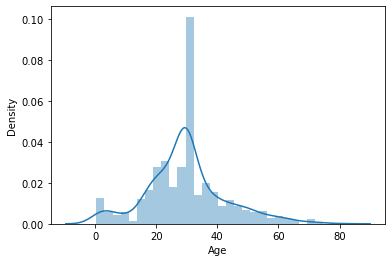

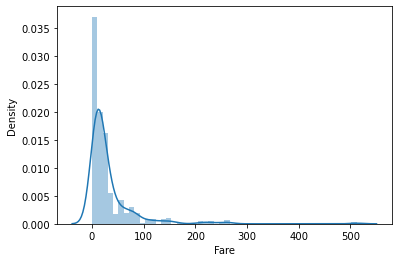

In [38]:
import seaborn as sns
import matplotlib as plt

for col in dfNew.select_dtypes('float') :
    plt.pyplot.figure()
    sns.distplot(dfNew[col])

In [39]:
dfNew.drop(columns='Title',inplace=True)

# Correlation between Sex and Age

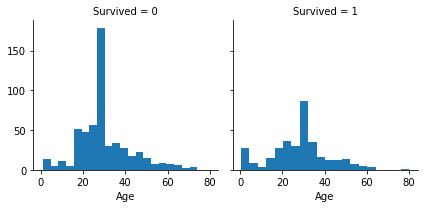

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt
g=sn.FacetGrid(dfNew,col='Survived')
g.map(plt.hist,'Age',bins=20)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

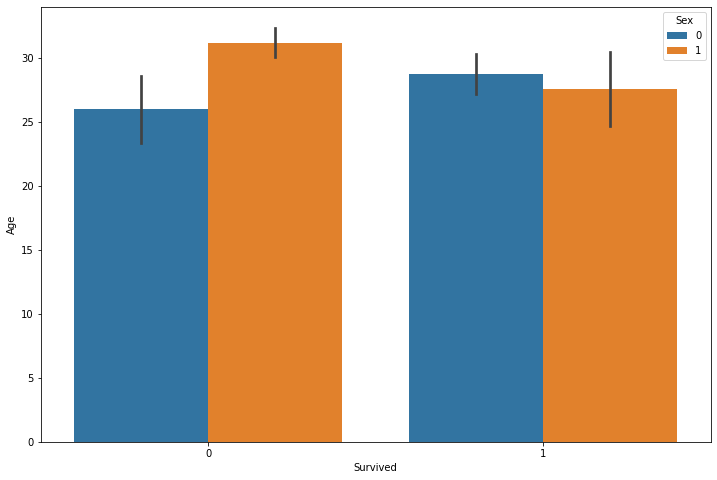

In [41]:
plt.figure(figsize=(12, 8))

sn.barplot(data=dfNew,x="Survived",y="Age",hue="Sex")

<AxesSubplot:>

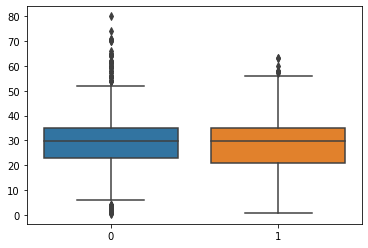

In [42]:
import numpy as np
dmale=np.array(dfNew[dfNew['Sex']==1]['Age'])
dfemale=np.array(dfNew[dfNew['Sex']==0]['Age'])
data1=[dmale,dfemale]

sn.boxplot(data=data1)

C:\Users\GUERBOUB MHAMED\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

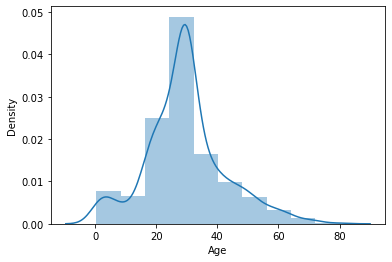

In [43]:
#bins = [0,10,20,30,40,50,60,70,80,90,100]
#df10['bins'] = pd.cut([df10['Age']], bins)
sn.distplot(dfNew['Age'],bins=10,kde=True)

In [87]:
import matplotlib.pyplot as plt

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 12 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )




    s = sns.heatmap(
        corr, 
        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : 0.9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 7 ,"size":7}

        )

<Figure size 2880x864 with 0 Axes>

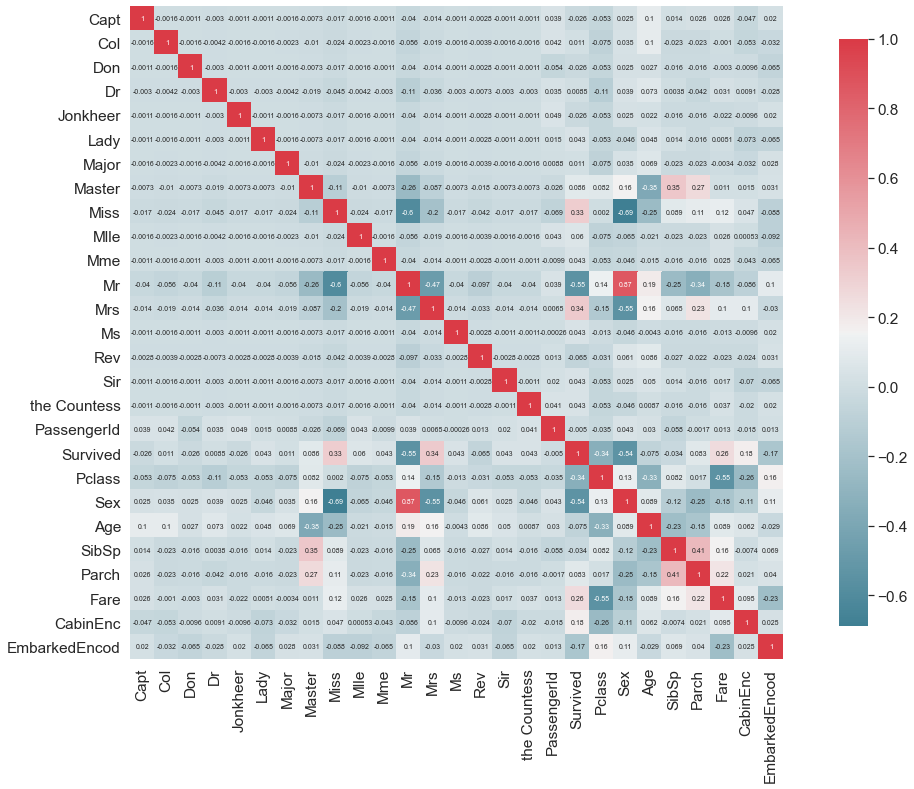

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40, 12))
# sns.set(font_scale=1.4)

plot_correlation_map(dfNew)

In [23]:
grid = sns.FacetGrid(data, row="Lady", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "CabinEnc", 'Age', alpha=.5, ci=None)
grid.add_legend()

NameError: name 'data' is not defined

In [89]:
from sklearn.preprocessing import StandardScaler
sd1=StandardScaler()
#sd.fit(df['Fare'].values.reshape(-1,1))
col2=sd1.fit_transform(df['Fare'].values.reshape(-1,1))
col2

array([[-3.84474648e-01],
       [-4.92186527e-01],
       [-4.88075355e-01],
       [-2.21900178e-01],
       [ 4.00714745e-01],
       [-4.86649935e-01],
       [-3.54275056e-01],
       [-3.29275834e-01],
       [-5.00239751e-01],
       [-1.22744850e-01],
       [-3.84474648e-01],
       [-4.68026853e-01],
       [ 6.62444543e-01],
       [-1.22744850e-01],
       [-4.90173220e-01],
       [-5.02756384e-01],
       [ 3.61193803e+00],
       [-5.00658519e-01],
       [ 8.33575565e-01],
       [ 1.16577108e+00],
       [-4.89418231e-01],
       [-5.05776343e-01],
       [-1.22744850e-01],
       [-4.84133302e-01],
       [-2.53609749e-01],
       [-3.84474648e-01],
       [ 9.48334015e-01],
       [ 2.04457921e+00],
       [-4.84133302e-01],
       [-3.55114605e-01],
       [-4.84133302e-01],
       [-1.22744850e-01],
       [ 3.81888980e+00],
       [-1.11671667e-01],
       [-2.23410157e-01],
       [-8.80998783e-02],
       [-2.23410157e-01],
       [-1.11671667e-01],
       [-4.9

In [93]:
import sklearn
sklearn.__version__

'0.24.1'